SVM model testing

In [1]:
from torch.utils.data.dataloader import DataLoader
import argparse
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from sklearn.model_selection import GridSearchCV

In [9]:
colnames = ['ID','diagnosis','radius','texture','perimeter','area','smoothness','compactness','concavity','concave points','symmetry','fractal dimension','radius se','texture se','perimeter se','area se','smoothness se','compactness se','concavity se','concave points se','symmetry se','fractal dimension se',' worst radius','worst texture','worst perimeter','worst area','worst smoothness','worst compactness','worst concavity','worst concave points','worst symmetry','worst fractal dimension']
df = pd.read_csv("/Users/ruthwetters/Downloads/wdbc.data",names=colnames)
df.head()

,ID,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


1) Basic SVM

In [10]:
#Encoding the categorical column
df = df.replace({"diagnosis":  {"M":1,"B":0}})

In [11]:
df = df.drop(columns=['perimeter','area','perimeter se','area se','worst perimeter','worst area'])

In [22]:
#Creating test and train set
X = df.iloc[:,2:]
y = df.iloc[:, 1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0,stratify=y)

In [23]:
#Create the SVM model
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0, C = 100, gamma='scale')
#Fit the model for the data

classifier.fit(X_train, y_train)

#Make the prediction
y_pred = classifier.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[89  1]
 [ 2 51]]
Accuracy: 96.48 %
Standard Deviation: 1.88 %


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        90
           1       0.98      0.96      0.97        53

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [26]:
#hyperparameter tuning: don't run again!
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'gamma':['scale', 'auto'],
              'kernel': ['linear','rbf','polynomial']}  
   
clf = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,n_jobs=-1) 
   
# fitting the model for grid search 
clf.fit(X_train, y_train) 

scores = ['precision', 'recall']

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print()
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_test) 
   
# print classification report 
print(classification_report(y_test, grid_predictions)) 

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    8.4s


Best parameters set found on development set:

{'C': 100, 'gamma': 'scale', 'kernel': 'linear'}

Grid scores on development set:

0.939 (+/-0.017) for {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
0.861 (+/-0.048) for {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
nan (+/-nan) for {'C': 0.1, 'gamma': 'scale', 'kernel': 'polynomial'}
0.939 (+/-0.017) for {'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}
0.911 (+/-0.061) for {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}
nan (+/-nan) for {'C': 0.1, 'gamma': 'auto', 'kernel': 'polynomial'}
0.955 (+/-0.023) for {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
0.913 (+/-0.019) for {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
nan (+/-nan) for {'C': 1, 'gamma': 'scale', 'kernel': 'polynomial'}
0.955 (+/-0.023) for {'C': 1, 'gamma': 'auto', 'kernel': 'linear'}
0.937 (+/-0.035) for {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
nan (+/-nan) for {'C': 1, 'gamma': 'auto', 'kernel': 'polynomial'}
0.955 (+/-0.028) for {'C': 10, 'gamma': 'scale', 'kernel': '

[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    9.5s finished


In [27]:
#{'C': 100, 'gamma': 'scale', 'kernel': 'linear'}

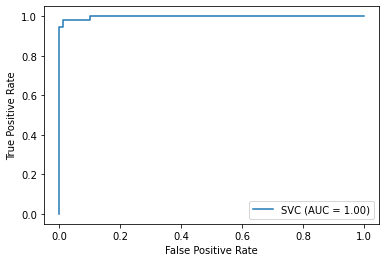

In [28]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifier, X_test, y_test)
plt.show()

In [29]:
import pickle
filename = 'finalized_svm.sav'
pickle.dump(classifier, open(filename, 'wb'))